In [1]:
import numpy as np
from keras import models
import matplotlib.pyplot as plt
from datagenerator import DataGenerator
import os
from mpl_toolkits.mplot3d import Axes3D

/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Set some parameters.
Here you can specify which model to use.

In [2]:
input_type = "voxelgrid"
qrcodes_validate = ["SAM-GOV-099", "SAM-GOV-005", "SAM-GOV-013", "SAM-GOV-004", "SAM-GOV-044"]

# Create a the data-generator.

In [3]:
if os.path.exists("datasetpath.txt"):
    dataset_path = open("datasetpath.txt", "r").read().replace("\n", "")
else:
    dataset_path = "../data"
    
data_generator = DataGenerator(dataset_path=dataset_path, input_type=input_type, output_targets=["height", "weight"])

# Loading the model.

In [4]:
model_path = "20180709-1445-voxelgrid.h5"
model = models.load_model(model_path)
model.summary()
        
print("")
print("Loaded", model_path + ".")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 4,202,818
Trainable params: 4,202,818
Non-trainable params: 0
_________________________________________________________________

Loaded 20180709-1445-voxelgrid.h5.


# Compute the loss on a random set.

In [5]:
print("Generating samples...")
x_input, y_output = next(data_generator.generate(size=100, qrcodes_to_use=qrcodes_validate))

print("Evaluating...")
loss, metric = model.evaluate(x_input, y_output, verbose=0)
print("Loss:", loss)
print("Metric:", metric)
print("Done.")

Generating samples...
Evaluating...
Loss: 5.863247947692871
Metric: 0.9674975204467774
Done.


# Visualize Error for some samples.

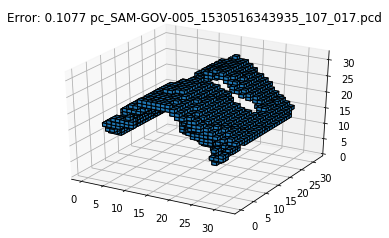

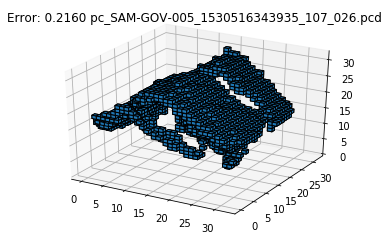

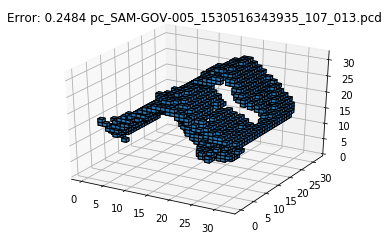

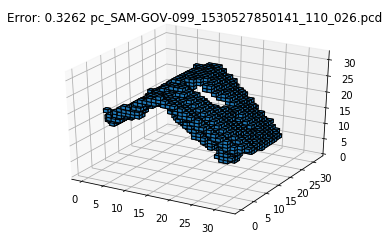

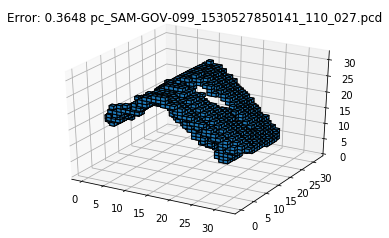

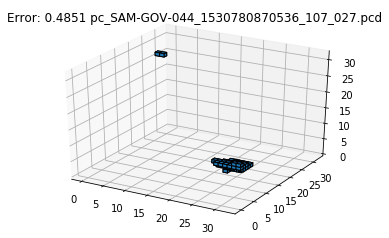

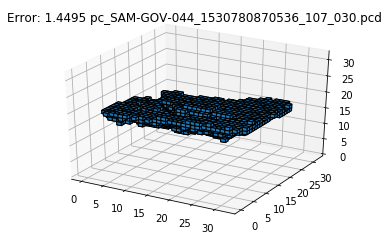

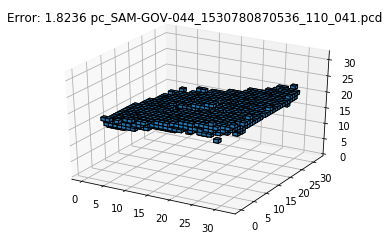

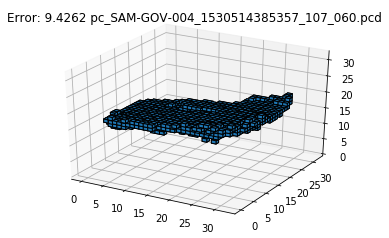

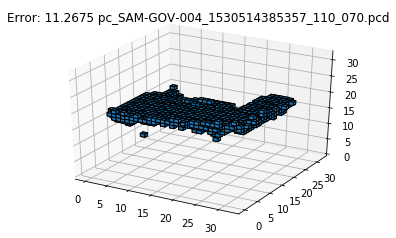

In [6]:
num_samples = 10

# Create some data.
x_input, y_output, file_paths = next(data_generator.generate(size=num_samples, qrcodes_to_use=qrcodes_validate, yield_file_paths=True))

# Predict.
y_output_pred = model.predict(x_input)

# Compute the errors.
errors = np.sum(np.abs(y_output - y_output_pred), axis=1)

# Sort the errors and visualize.
sorted_indices = np.argsort(errors)
#plt.subplots(rows, columns, figsize=(15,15))
for index, sorted_index in enumerate(sorted_indices):
    #plt.subplot(rows, columns, index + 1)
    #render_data(x_input[sorted_index], input_type)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.patch.set_alpha(0.1)
    ax.voxels(x_input[sorted_index],  edgecolor='k')
    plt.title("Error: {:.4f}".format(errors[sorted_index]) + " " + file_paths[sorted_index].split("/")[-1])
    plt.show()
    plt.close()
 